In [74]:
!pip install -U statsmodels

In [75]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [78]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


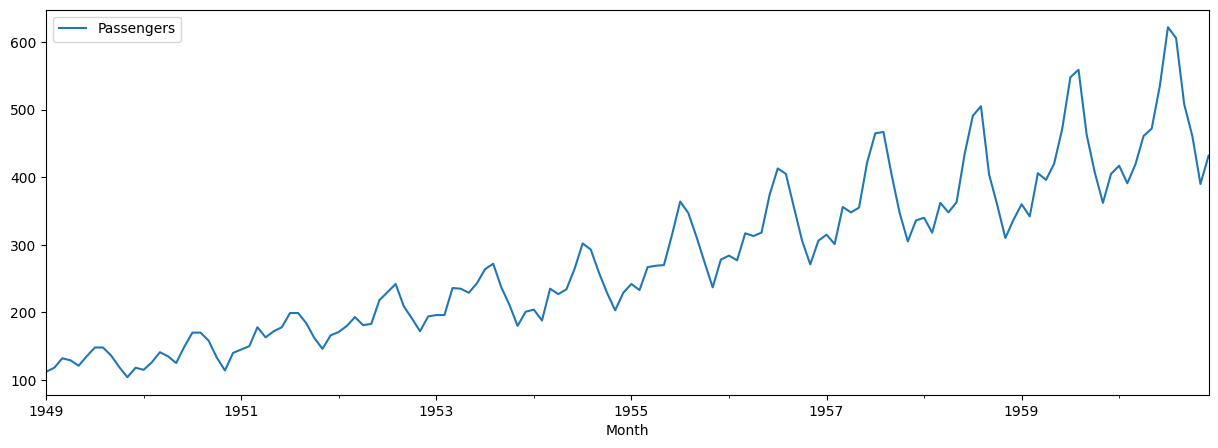

In [79]:
df.plot(figsize=(15, 5));

In [80]:
df['1stdiff'] = df['Passengers'].diff()

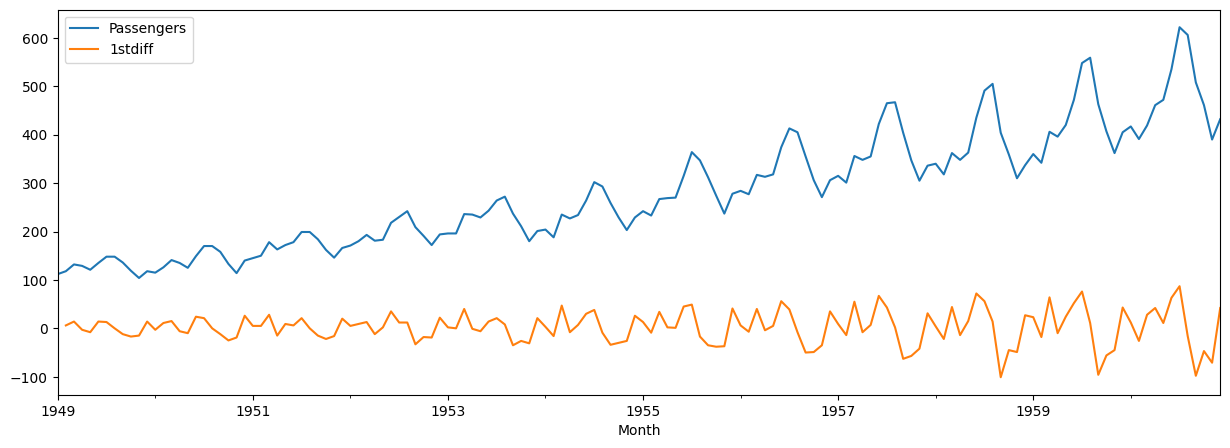

In [81]:
df.plot(figsize=(15, 5));

In [82]:
df['LogPassengers'] = np.log(df['Passengers'])

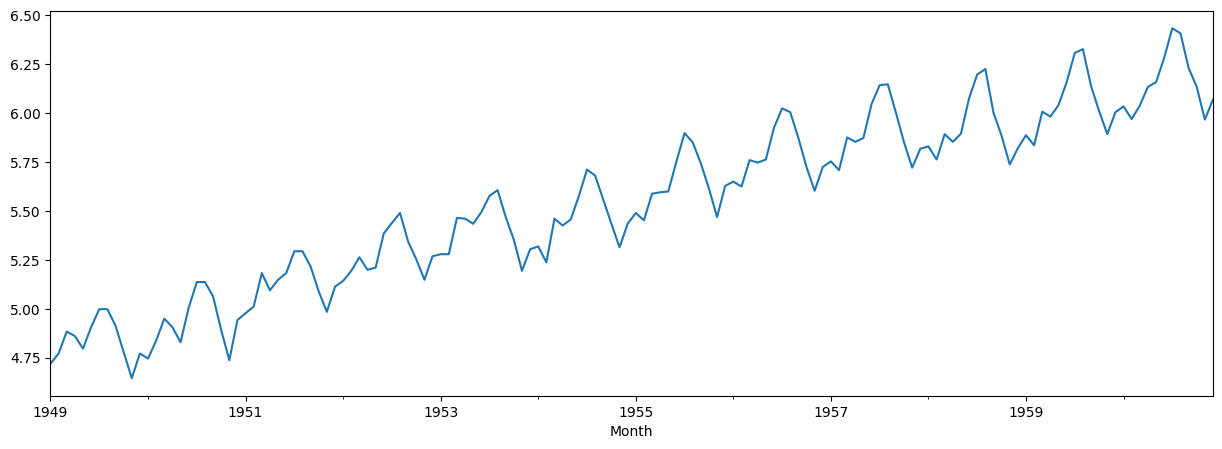

In [83]:
df['LogPassengers'].plot(figsize=(15, 5));

In [84]:
from statsmodels.tsa.arima.model import ARIMA

In [85]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [86]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [87]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [88]:
arima_result = arima.fit()

In [89]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1])

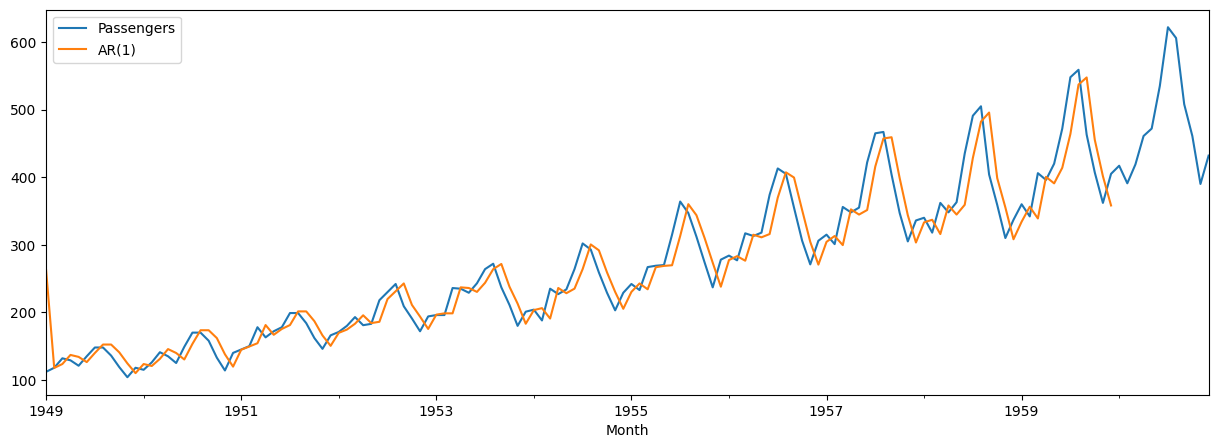

In [90]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [91]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

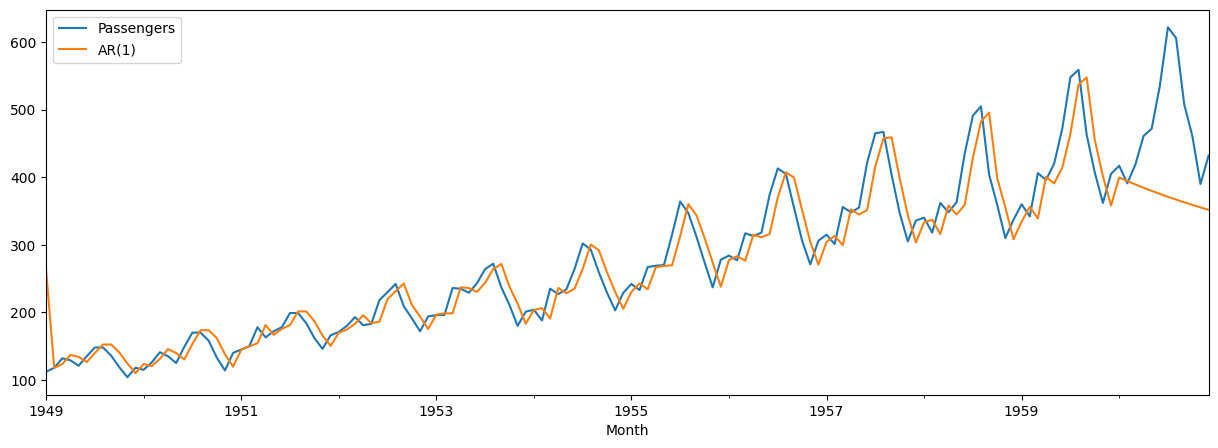

In [92]:
df[['Passengers', 'AR(1)']].plot(figsize=(15, 5));

In [93]:
# Explore prediction result further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [94]:
# Confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [95]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

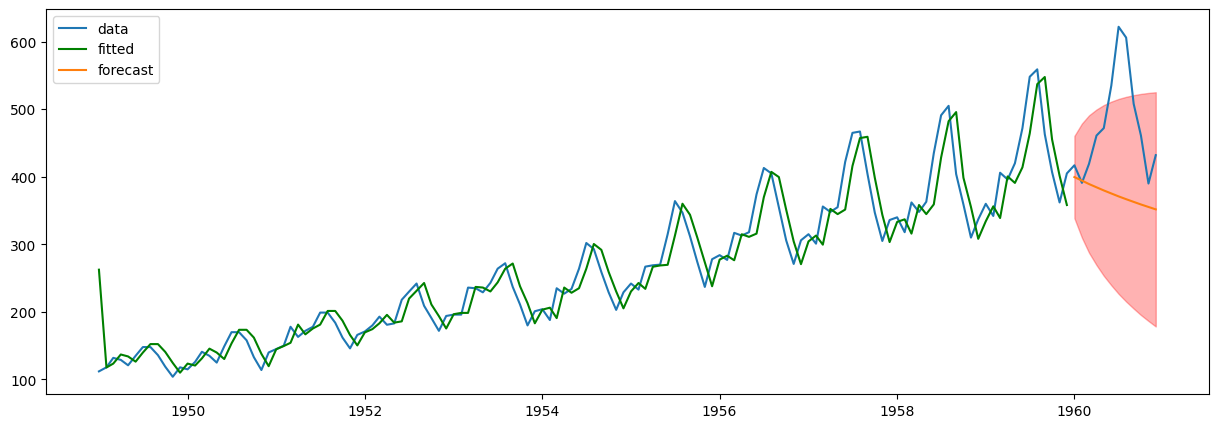

In [96]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


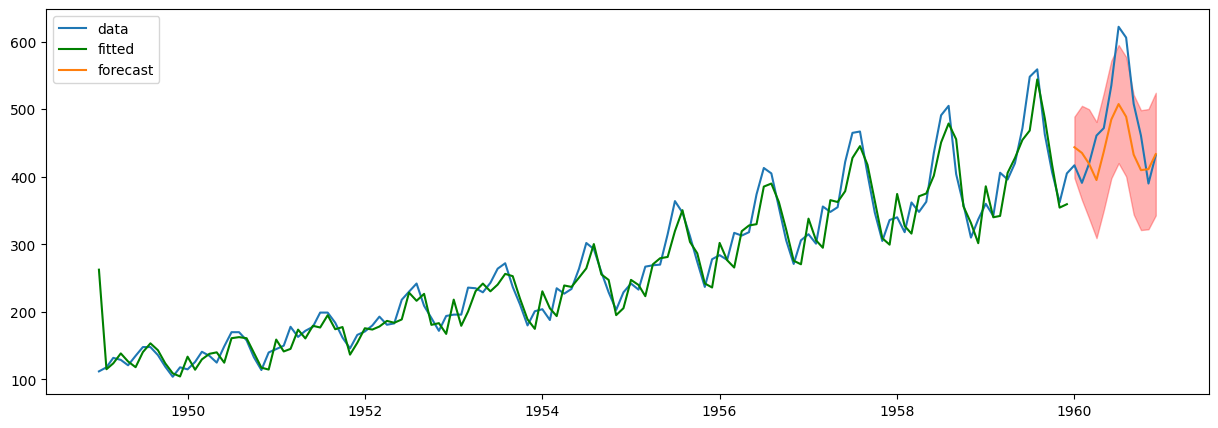

In [97]:
arima = ARIMA(train['Passengers'], order=(10,0,0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


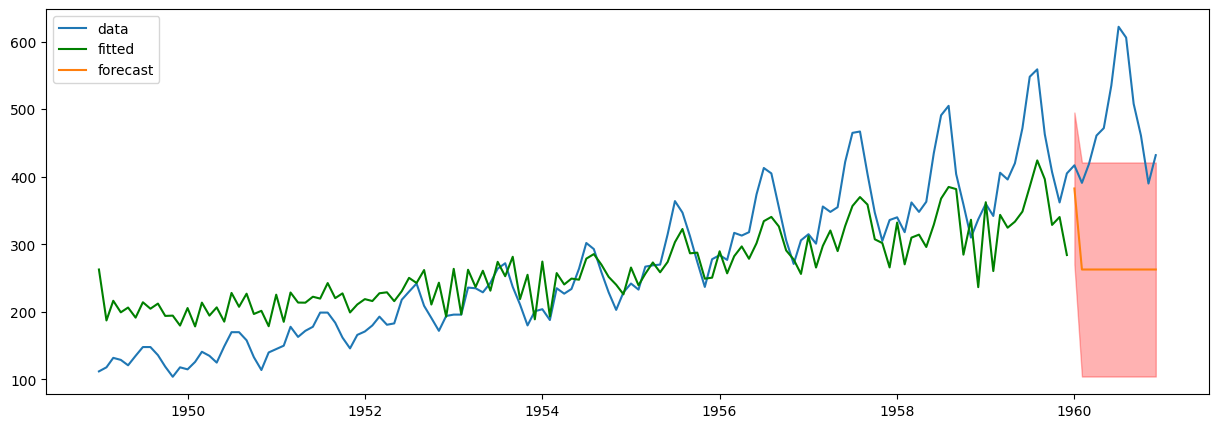

In [98]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [99]:
df['Log1stDiff'] = df['LogPassengers'].diff()

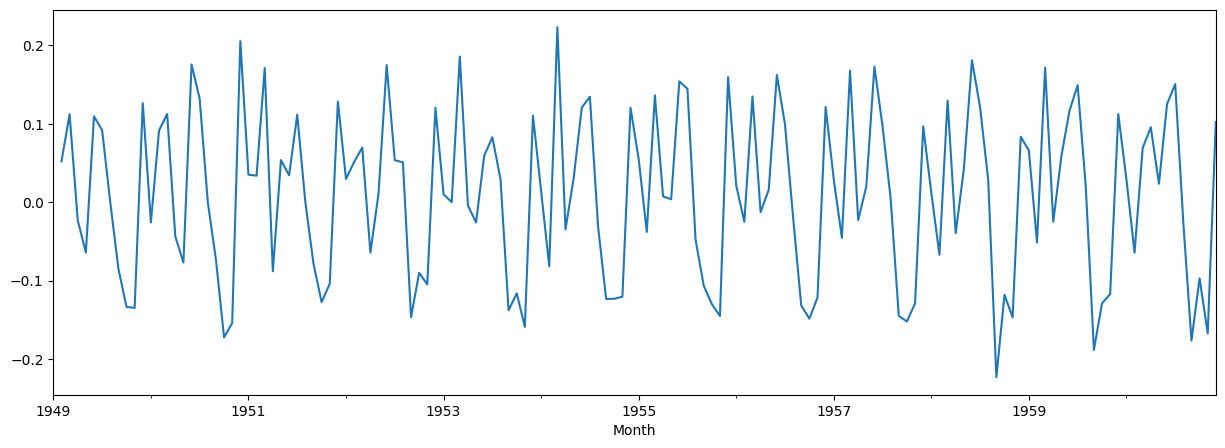

In [100]:
df['Log1stDiff'].plot(figsize=(15, 5));

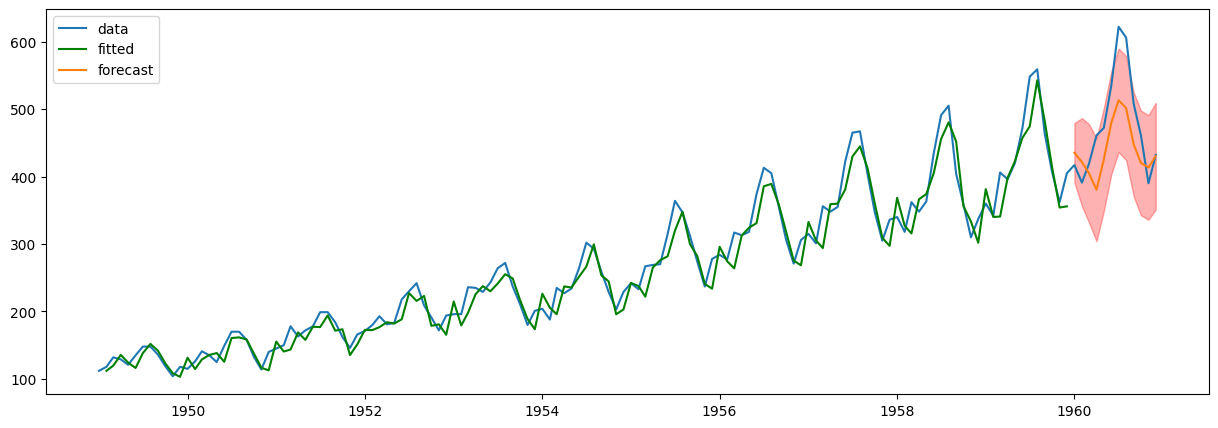

In [101]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

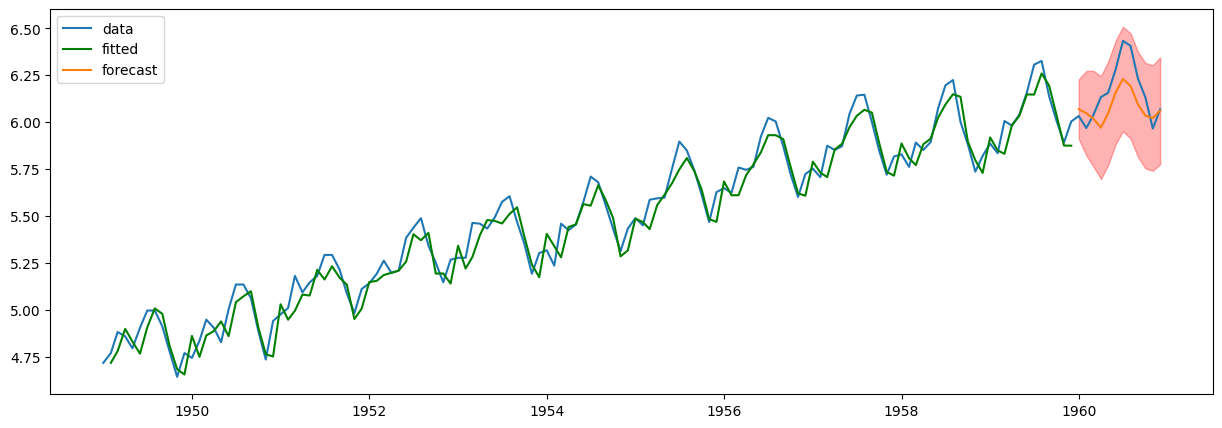

In [102]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


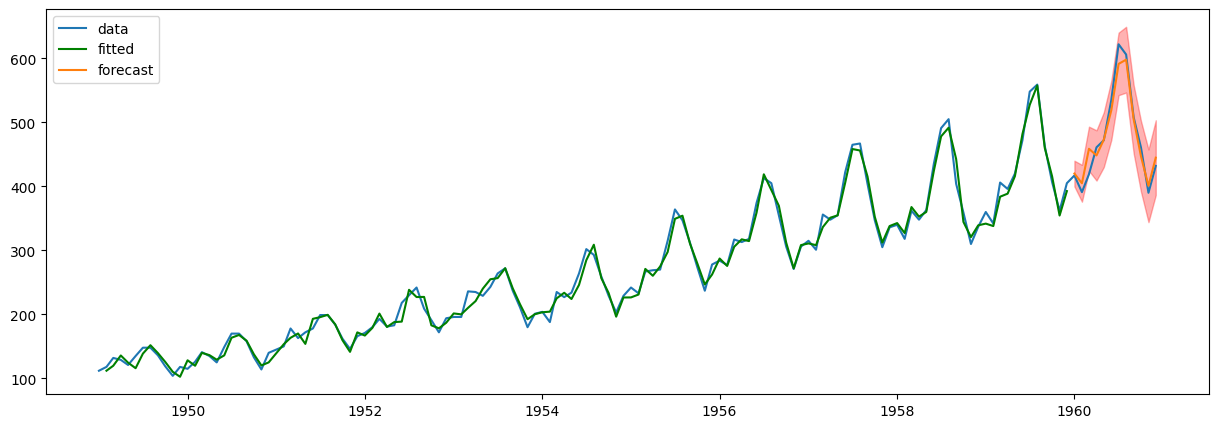

In [103]:
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


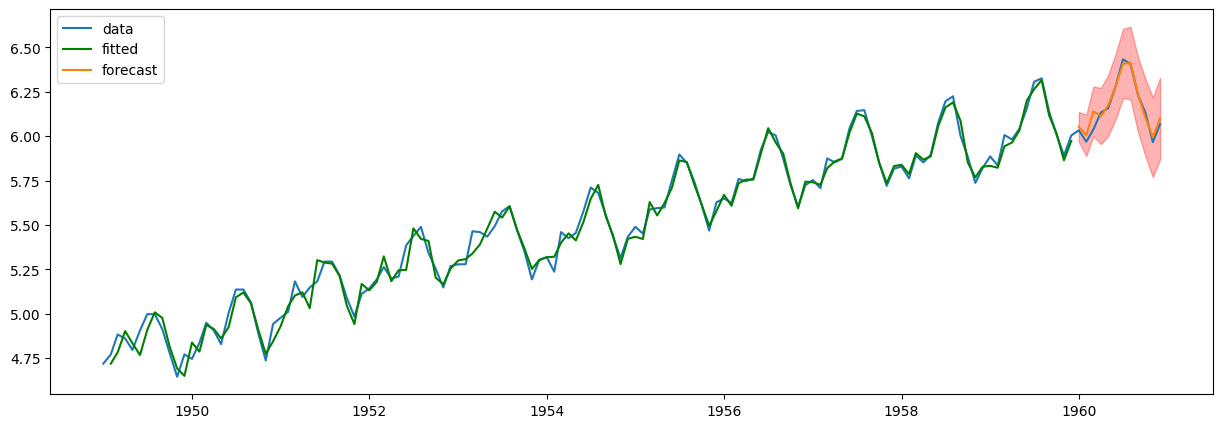

In [104]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


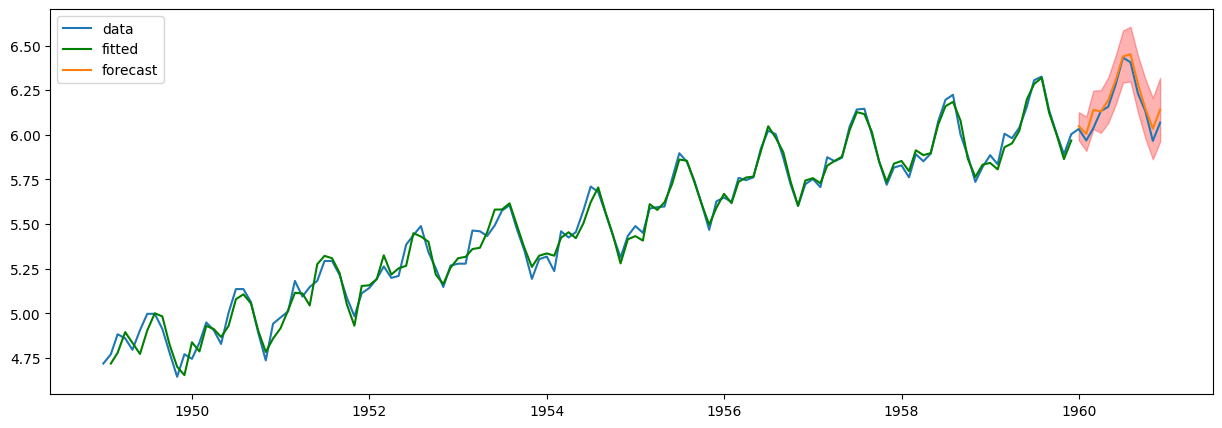

In [109]:
arima = ARIMA(train['LogPassengers'], order=(12,1,1))
arima_result_log1211 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1211, 1, col='LogPassengers')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


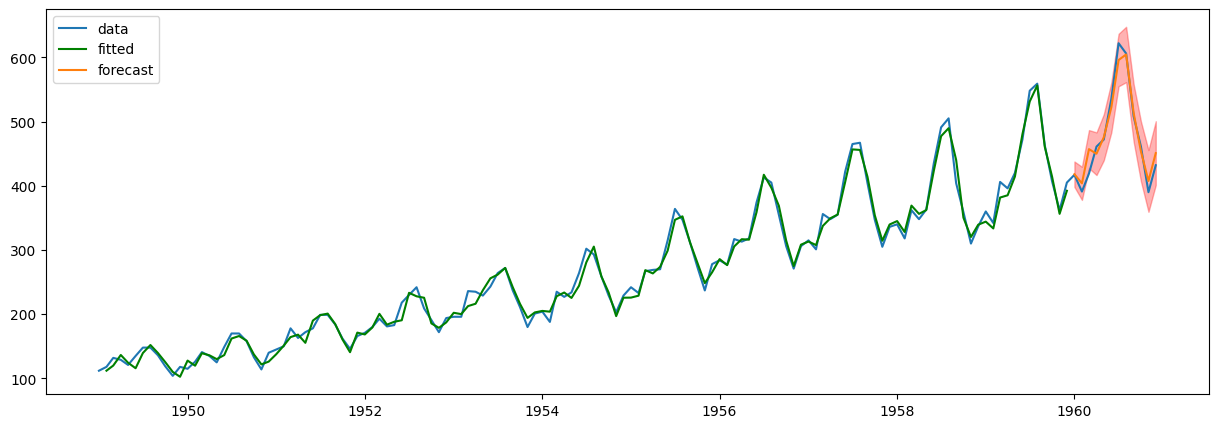

In [110]:
arima = ARIMA(train['Passengers'], order=(12,1,1))
arima_result_1211 = arima.fit()
plot_fit_and_forecast_int(arima_result_1211, 1, col='Passengers')

In [111]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)

  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [112]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,1):", rmse(arima_result_1211, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))
print("ARIMA(12,1,1) logged:", rmse(arima_result_log1211, True))

ARIMA(8,1,1): 59.06459052741517
ARIMA(8,1,1) logged: 61.59740688711714
ARIMA(12,1,0): 17.5464070655406
ARIMA(12,1,1): 16.70693196345009
ARIMA(12,1,0) logged: 16.107448748925506
ARIMA(12,1,1) logged: 22.796933638673877


In [136]:
import warnings,sys
warnings.filterwarnings('ignore')
best_score,best_options = sys.maxsize,[]
for d in range(3):
  for ar in range(13):
    for ma in range(13):
      arima = ARIMA(train['LogPassengers'], order=(ar,d,ma))
      arima_result_log = arima.fit()
      arima = ARIMA(train['Passengers'], order=(ar,d,ma))
      arima_result = arima.fit()
      rmse_score = rmse(arima_result_log, True)
      if rmse_score<best_score:
        best_score = rmse_score
        best_options = [ar,d,ma,"log"]
      # print("ARIMA(12,1,{}) logged:".format(ma), rmse_score)
      rmse_score = rmse(arima_result, False)
      if rmse_score<best_score:
        best_score = rmse_score
        best_options = [ar,d,ma,"non-log"]
      # print("ARIMA(12,1,{}) non-logged:".format(ma), rmse_score)

    print(best_score,"    ",best_options)


138.17191726654278      [0, 0, 10, 'non-log']
61.9450582860858      [1, 0, 12, 'non-log']
47.239687000518      [2, 0, 12, 'log']
47.239687000518      [2, 0, 12, 'log']
42.23764874890678      [4, 0, 5, 'non-log']
30.830286215227222      [5, 0, 9, 'non-log']
30.826399027579242      [6, 0, 9, 'non-log']
25.56885358535807      [7, 0, 11, 'non-log']
22.103330372563455      [8, 0, 7, 'log']
20.791745676447153      [9, 0, 9, 'log']
18.62086575239705      [10, 0, 9, 'log']
18.62086575239705      [10, 0, 9, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
15.68674939545037      [12, 0, 7, 'log']
13.542057852539207      [9, 1, 12, 'log']
13.542057852539207      [9, 1, 12, 'l

18.989376315985226


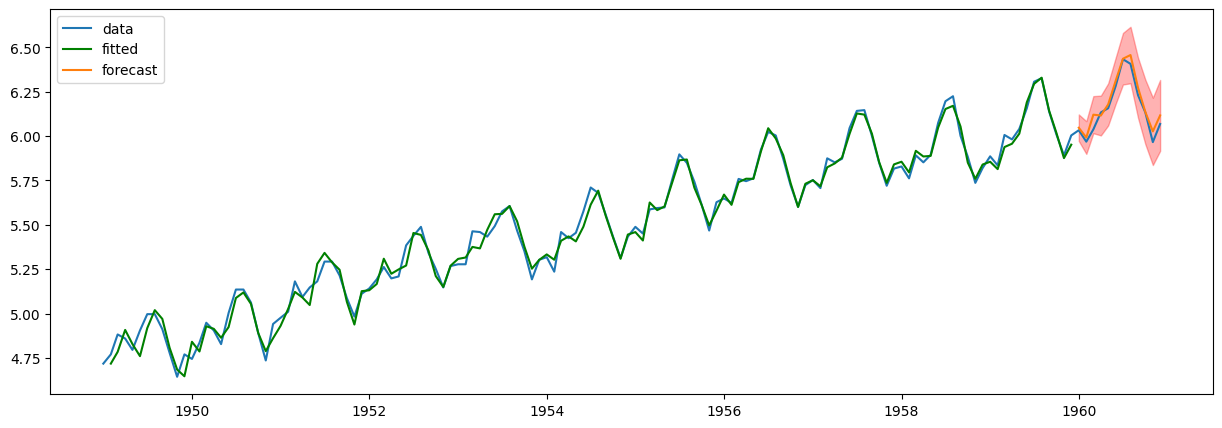

In [135]:
arima = ARIMA(train['LogPassengers'], order=(11,1,9))
arima_result_log = arima.fit()
plot_fit_and_forecast_int(arima_result_log, 1, col='LogPassengers')
print(rmse(arima_result_log, True))